# Introduction to Artificial Neural Networks with Keras

Since I don't currently own a GPU with CUDA support, I'll be using the PlaidML backend:

In [1]:
import os
os.environ["KERAS_BACKEND"] = 'plaidml.keras.backend'
import keras

keras.__version__

Using plaidml.keras.backend backend.


'2.2.4'

## Image Classifier

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

The images are represented as a $28 \times 28$ array of integers (from 0 to 255):

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

INFO:plaidml:Opening device "opencl_amd_ellesmere.0"


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=256)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 118us/step - loss: 1.2459 - acc: 0.6315 - val_loss: 0.8612 - val_acc: 0.7214
Epoch 2/30
55000/55000 [==============================] - 1s 20us/step - loss: 0.7716 - acc: 0.7520 - val_loss: 0.6924 - val_acc: 0.7792
Epoch 3/30
55000/55000 [==============================] - 1s 21us/step - loss: 0.6605 - acc: 0.7857 - val_loss: 0.6182 - val_acc: 0.8000
Epoch 4/30
55000/55000 [==============================] - 1s 22us/step - loss: 0.6008 - acc: 0.8023 - val_loss: 0.5690 - val_acc: 0.8148
Epoch 5/30
55000/55000 [==============================] - 1s 18us/step - loss: 0.5614 - acc: 0.8134 - val_loss: 0.5370 - val_acc: 0.8230
Epoch 6/30
55000/55000 [==============================] - 1s 18us/step - loss: 0.5342 - acc: 0.8206 - val_loss: 0.5156 - val_acc: 0.8296
Epoch 7/30
55000/55000 [==============================] - 1s 19us/step - loss: 0.5146 - acc: 0.8248 - val_loss: 0.4957 - val_acc

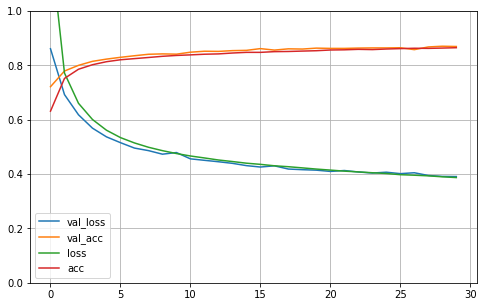

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Regression MLP

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 230us/step - loss: 0.7574 - val_loss: 0.6011
Epoch 2/20
11610/11610 [==============================] - 1s 117us/step - loss: 0.4991 - val_loss: 0.5018
Epoch 3/20
11610/11610 [==============================] - 1s 98us/step - loss: 0.4546 - val_loss: 0.4530
Epoch 4/20
11610/11610 [==============================] - 1s 87us/step - loss: 0.4337 - val_loss: 0.4509
Epoch 5/20
11610/11610 [==============================] - 1s 89us/step - loss: 0.4235 - val_loss: 0.4321
Epoch 6/20
11610/11610 [==============================] - 1s 105us/step - loss: 0.4225 - val_loss: 0.4370
Epoch 7/20
11610/11610 [==============================] - 1s 126us/step - loss: 0.4088 - val_loss: 0.4200
Epoch 8/20
11610/11610 [==============================] - 1s 118us/step - loss: 0.4061 - val_loss: 0.4277
Epoch 9/20
11610/11610 [==============================] - 1s 101us/step - loss: 0.4097 - val_loss: 0.4211


0.3645854718925417

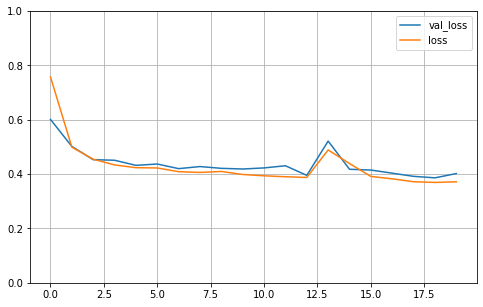

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Exercises

## 3.
A classical Perceptron will only be able to converge if the dataset is linearly separable, and it doesn't estimate class probabilities. This is not the case for a Logistic Regression classifier, which will converge to a good solution even if the dataset is not linearly separable, and it will output the class probabilities. Changing the Perceptron activation function to the logistic function (or softmax if there are multiple neurons), and training it using Gradient Descent will make it equivalent to a Logistic Regression classifier.

## 4.
The derivative of the logistic activation function is always nonzero, so Gradient Descent can always "roll down" the slope. If the activation function is a step function, GD cannot move at all.

## 5.
ReLU, hyperbolic tangent (tanh) and sigmoid (logistic).

## 6.
1. The shape of the input matrix $\rm{X}$ is $m \times 10$, where $m$ represents the batch size.
2. The shape of the weight vector $\rm{W}_h$ is $10 \times 50$, and the shape of its bias vector $\rm{b}_h$ is $50$.
3. The shape of the weight vector $\rm{W}_o$ is $50 \times 3$, and the shape of its bias vector $\rm{b}_o$ is $3$.
4. The shape of the network's output matrix $Y$ is $m \times 3$.
5. $\rm{Y} = \text{ReLU}(\text{ReLU}(\rm{X}\rm{W}_h + \rm{b}_h)\rm{W}_o + \rm{b}_o)$

## 7.
Only one neuron is necessary (indicating the probability of being spam, for example). The activation function used when estimating probabilities is typically the logistic function. To work with the MNIST dataset, 10 neurons on the output layers would be necessary, using the softmax activation function. To predict housing prices, just one neuron would be necessary using no activation function (or perhaps ReLU to guarantee that the predicted values are positive).

## 8.
Backpropagation is a technique used to train neural networks. It computes the gradients of the cost function with regard to every model parameter, then performs a Gradient Descent step using these gradients. This backpropagation step is repeated many times until the model parameters converges to values that minimize the cost function. Backpropagation uses reverse-mode autodiff to compute the gradients. The difference is that backpropagation refers to the whole process of training a neural network using multiple backpropagation steps, while reverse-mode autodiff is just a technique to compute the gradients efficiently, which happens to be used by backpropagation.

## 9.
These are the hyperparameters to weak in a basic MLP: number of hidden layers, number of neurons per hidden layers, and the activation function in each hidden layer and in the output layer. Reducing the number of hidden layers and the number of neurons per hidden layer will regularize the model, making it less likely to overfit the training data.

## 10.

In [14]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [17]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint('mnist_model.h5', save_best_only=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),
                    callbacks=[early_stopping_cb, checkpoint_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 13s 237us/step - loss: 0.2333 - acc: 0.9286 - val_loss: 0.1083 - val_acc: 0.9694
Epoch 2/100
55000/55000 [==============================] - 9s 159us/step - loss: 0.0910 - acc: 0.9716 - val_loss: 0.0910 - val_acc: 0.9740
Epoch 3/100
55000/55000 [==============================] - 10s 173us/step - loss: 0.0617 - acc: 0.9795 - val_loss: 0.0817 - val_acc: 0.9772
Epoch 4/100
55000/55000 [==============================] - 9s 156us/step - loss: 0.0445 - acc: 0.9854 - val_loss: 0.0738 - val_acc: 0.9758
Epoch 5/100
55000/55000 [==============================] - 9s 167us/step - loss: 0.0327 - acc: 0.9894 - val_loss: 0.0716 - val_acc: 0.9814
Epoch 6/100
55000/55000 [==============================] - 9s 157us/step - loss: 0.0242 - acc: 0.9927 - val_loss: 0.0824 - val_acc: 0.9778
Epoch 7/100
55000/55000 [==============================] - 9s 159us/step - loss: 0.0174 - acc: 0.9947 - val_loss: 0

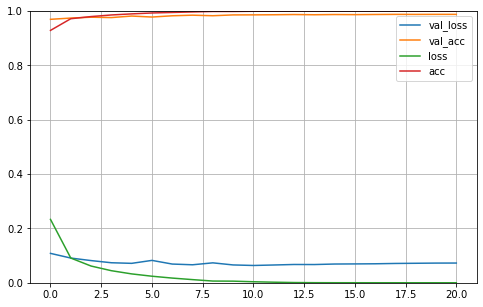

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
# Rollback to best model
model = keras.models.load_model('mnist_model.h5') 
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 166us/step


[15.13124301147461, 0.9829]